In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("./Data/test(in).csv", parse_dates=True)
dataset.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


# Task-1

In [3]:
!pip3 install transformers


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

In [5]:
pipe = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")  

Device set to use mps:0


In [6]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

model = model.to(device)
model.eval()
class_names = ["negative", "neutral", "positive"]

def get_sentiments(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = F.softmax(logits, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()

    if predicted_class in [0, 1]:
        return class_names[0]  # negative
    elif predicted_class == 2:
        return class_names[1]  # neutral
    else:
        return class_names[2]  # positive

Using device: mps


In [7]:
dataset["Sentiment"] = dataset["body"].apply(get_sentiments)

In [8]:
dataset.head(10)

,Subject,body,date,from,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,negative
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,negative
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,negative
5,RE: Favor,"sure, just call me the bank that delivers.\n \...",10/23/2011,eric.bass@enron.com,neutral
6,MG Inventory Summaries,Inventory summaries for both MGL and MGMCC as ...,4/5/2010,kayne.coulter@enron.com,positive
7,Forgot the Attachment,Please print attachment and make sure that e:m...,4/21/2010,patti.thompson@enron.com,positive
8,Garvin Brown - AXIA Sr. Power Scheduler,Please advise me of your interest in Garvin's ...,2/7/2010,sally.beck@enron.com,positive
9,More Dallas ASE Information,The start time for Tuesday morning has been ch...,2/6/2010,kayne.coulter@enron.com,neutral


# Task-2

In [10]:
dataset.info()
dataset.describe()
dataset['date'] = pd.to_datetime(dataset['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   Sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


In [11]:
dataset.head()

,Subject,body,date,from,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,negative
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,negative
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,negative


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/9w/csn11pg56mz_mqtbmcxzdc340000gn/T/ipykernel_492/1697442905.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataset, x='Sentiment', palette=custom_palette)


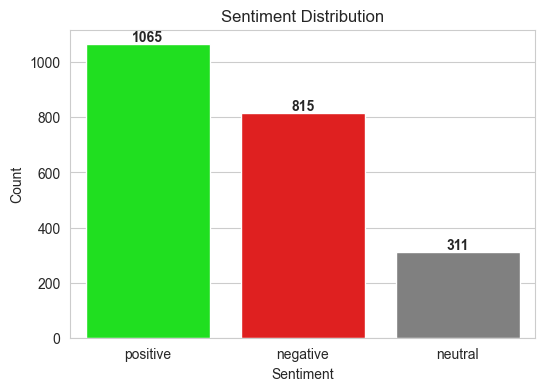

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {
    'positive': 'lime',
    'negative': 'red',
    'neutral': 'gray'
}

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=dataset, x='Sentiment', palette=custom_palette)

for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), 'd'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10, fontweight='bold'
    )

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

/var/folders/9w/csn11pg56mz_mqtbmcxzdc340000gn/T/ipykernel_492/4123777886.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_monthly = dataset.set_index('date').groupby('Sentiment').resample('M').size().unstack()
/var/folders/9w/csn11pg56mz_mqtbmcxzdc340000gn/T/ipykernel_492/4123777886.py:1: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sentiment_monthly = dataset.set_index('date').groupby('Sentiment').resample('M').size().unstack()


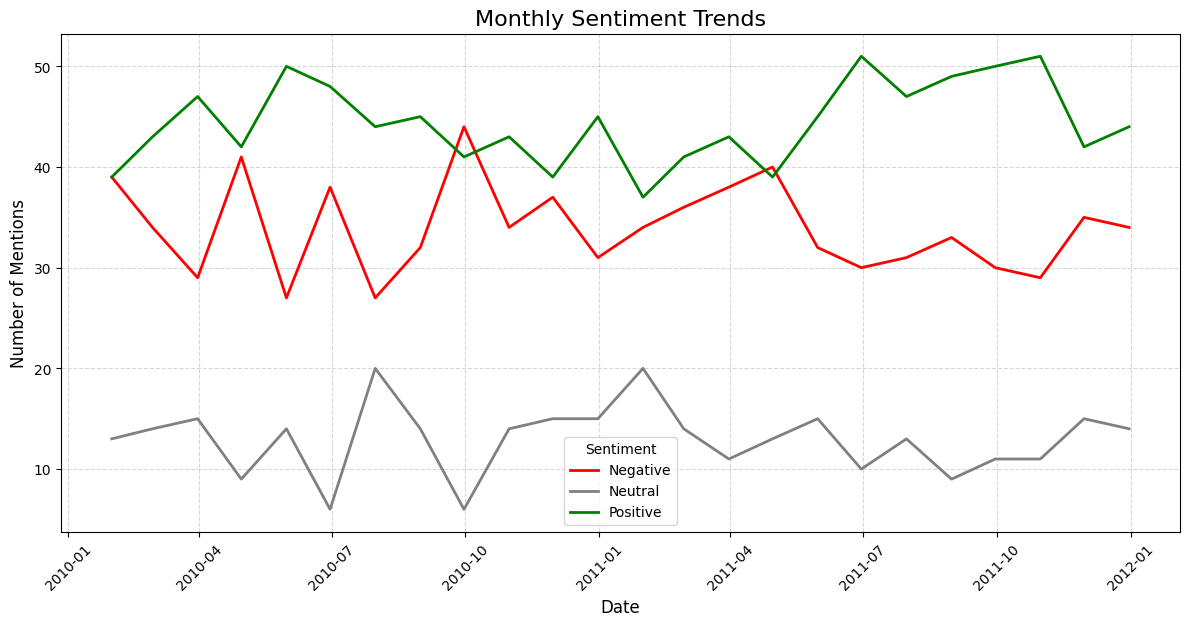

In [23]:
sentiment_monthly = dataset.set_index('date').groupby('Sentiment').resample('M').size().unstack()

plt.figure(figsize=(12, 6))
for sentiment in sentiment_monthly.index:
    color = {
        'positive': 'green',
        'negative': 'red',
        'neutral': 'gray'
    }.get(sentiment, 'black')
    plt.plot(sentiment_monthly.columns, sentiment_monthly.loc[sentiment], label=sentiment.capitalize(), color=color, linewidth=2)

# Enhancements
plt.title("Monthly Sentiment Trends", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Mentions", fontsize=12)
plt.legend(title='Sentiment')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='from'>

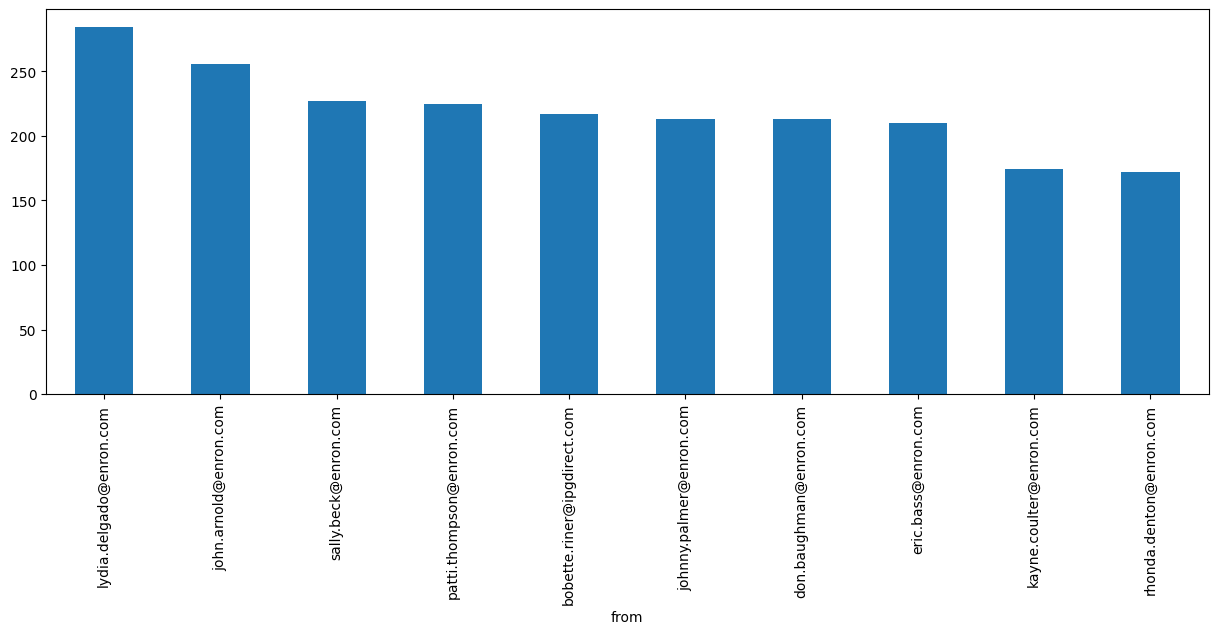

In [34]:
plt.figure(figsize=(15, 5))

dataset['from'].value_counts().head(10).plot(kind='bar')

# Task-3

In [48]:
SENTIMENT_SCORE_MAP = {
    'positive': 2,
    'neutral': 0,
    'negative': -1
}

def sentiment_score(label):
    if not isinstance(label, str):
        return 0

    return SENTIMENT_SCORE_MAP.get(label.lower().strip(), 0)

dataset['Score'] = dataset['Sentiment'].apply(sentiment_score)

In [49]:
dataset['month'] = dataset['date'].dt.to_period('M')
monthly_scores = dataset.groupby(['from', 'month'])['Score'].sum().reset_index()

In [50]:
dataset.head()

,Subject,body,date,from,Sentiment,Score,month
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,positive,2,2010-05
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,negative,-1,2010-07
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,negative,-1,2011-07
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,negative,-1,2010-03
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,negative,-1,2011-05


# Task-4

In [51]:
top3_pos = monthly_scores.sort_values(['month', 'Score', 'from'], ascending=[True, False, True]).groupby('month').head(3)

top3_neg = monthly_scores.sort_values(['month', 'Score', 'from'], ascending=[True, True, True]).groupby('month').head(3)

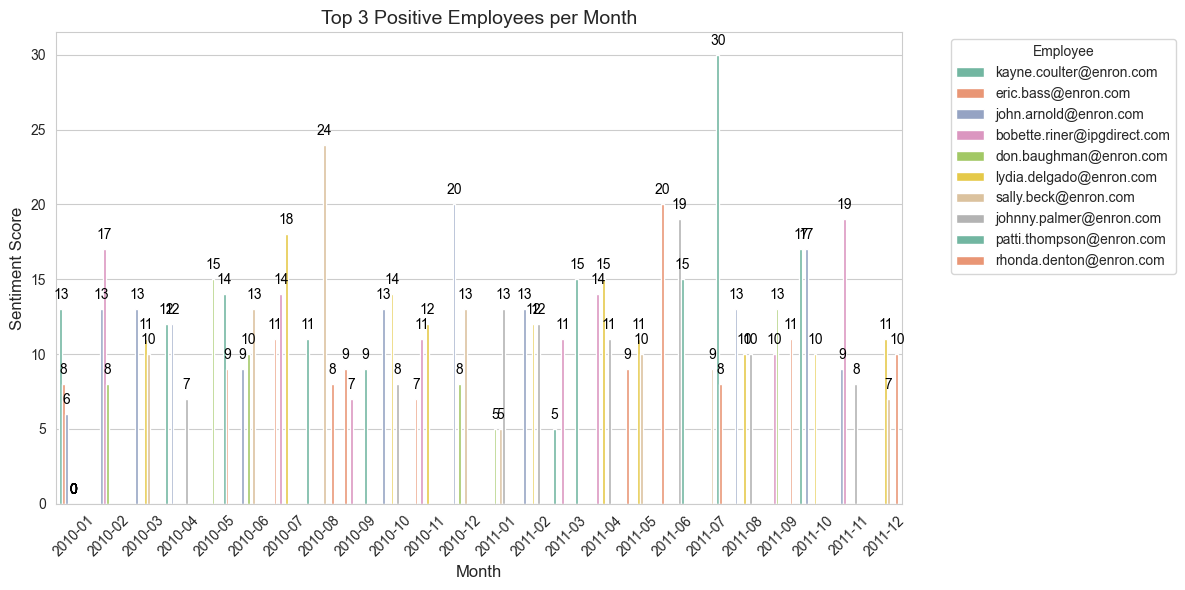

In [53]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=top3_pos,
    x='month',
    y='Score',
    hue='from',
    palette='Set2'
)

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{height:.0f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sentiment Score", fontsize=12)
plt.title("Top 3 Positive Employees per Month", fontsize=14)
plt.legend(title='Employee', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [116]:
top3_pos
top3_pos.sort_values(by="Score", ascending=False)

,from,month,Score
186,patti.thompson@enron.com,2011-07,30
223,sally.beck@enron.com,2010-08,24
83,john.arnold@enron.com,2010-12,20
65,eric.bass@enron.com,2011-06,20
22,bobette.riner@ipgdirect.com,2011-11,19
...,...,...,...
239,sally.beck@enron.com,2011-12,7
72,john.arnold@enron.com,2010-01,6
36,don.baughman@enron.com,2011-01,5
228,sally.beck@enron.com,2011-01,5


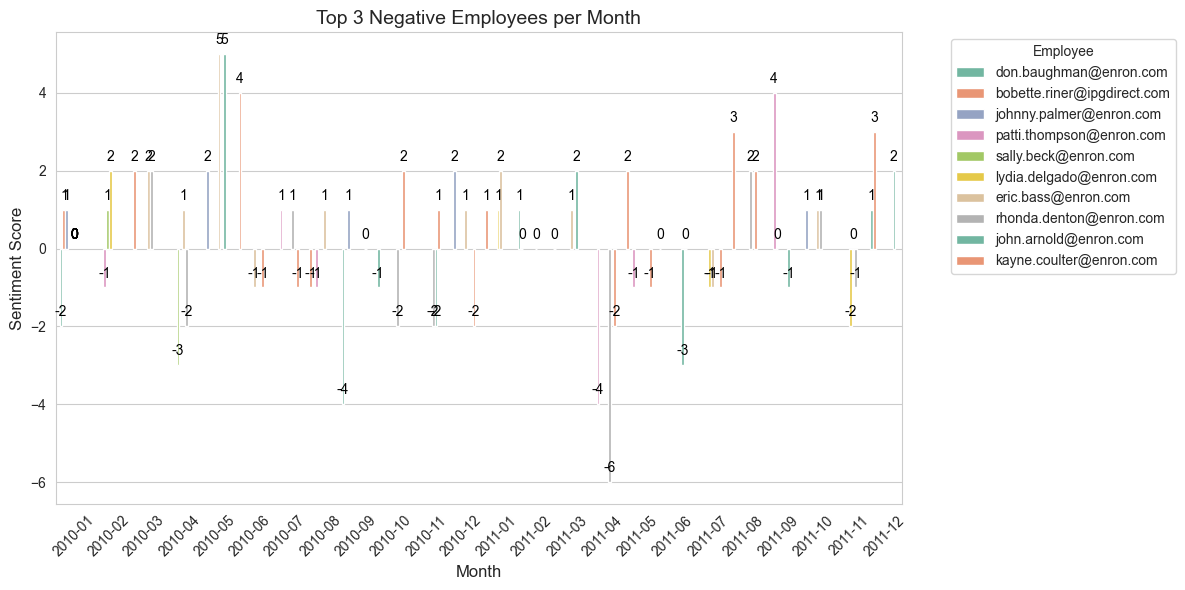

In [108]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=top3_neg,
    x='month',
    y='Score',
    hue='from',
    palette='Set2'
)

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{height:.0f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sentiment Score", fontsize=12)
plt.title("Top 3 Negative Employees per Month", fontsize=14)
plt.legend(title='Employee', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [119]:
top3_neg
top3_neg.sort_values(by="Score").head(5)

,from,month,Score
207,rhonda.denton@enron.com,2011-04,-6
183,patti.thompson@enron.com,2011-04,-4
32,don.baughman@enron.com,2010-09,-4
89,john.arnold@enron.com,2011-06,-3
219,sally.beck@enron.com,2010-04,-3


# Task-5

In [62]:
dataset_neg = dataset[dataset['Sentiment'] == 'negative'].copy()
dataset_neg = dataset_neg.sort_values(['from', 'date'])

In [63]:
risk_employees = set()
for emp in dataset_neg['from'].unique():
    dates = dataset_neg[dataset_neg['from'] == emp]['date'].tolist()
    for i in range(len(dates)):
        count = sum([(dates[j] - dates[i]).days <= 30 for j in range(i, len(dates))])
        if count >= 4:
            risk_employees.add(emp)
            break

In [67]:
dataset_neg["from"].unique()

array(['bobette.riner@ipgdirect.com', 'don.baughman@enron.com',
       'eric.bass@enron.com', 'john.arnold@enron.com',
       'johnny.palmer@enron.com', 'kayne.coulter@enron.com',
       'lydia.delgado@enron.com', 'patti.thompson@enron.com',
       'rhonda.denton@enron.com', 'sally.beck@enron.com'], dtype=object)

In [122]:
risk_employees

{'bobette.riner@ipgdirect.com',
 'don.baughman@enron.com',
 'eric.bass@enron.com',
 'john.arnold@enron.com',
 'johnny.palmer@enron.com',
 'kayne.coulter@enron.com',
 'lydia.delgado@enron.com',
 'patti.thompson@enron.com',
 'rhonda.denton@enron.com',
 'sally.beck@enron.com'}

# Task-6

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [101]:
features = dataset.groupby(['from', 'month']).agg({
    'body': lambda x: np.mean([len(msg.split()) for msg in x]),
    'Score': 'sum',
    'Sentiment': 'count'
}).rename(columns={'body': 'avg_word_count', 'Sentiment': 'msg_count'}).reset_index()

X = features[['avg_word_count', 'msg_count']]
y = features['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [102]:
print("MSE: ", mse)
print("R2: ", r2)

MSE:  17.403284247915327
R2:  0.3084668453305812


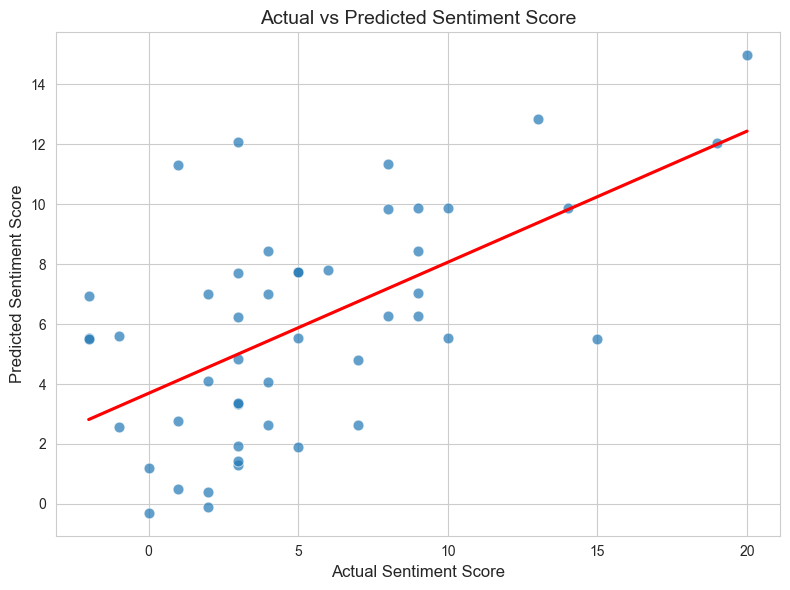

In [103]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, s=60)

sns.regplot(x=y_test, y=y_pred, scatter=False, color="red", ci=None)

plt.xlabel("Actual Sentiment Score", fontsize=12)
plt.ylabel("Predicted Sentiment Score", fontsize=12)
plt.title("Actual vs Predicted Sentiment Score", fontsize=14)

plt.tight_layout()
plt.show()

/var/folders/9w/csn11pg56mz_mqtbmcxzdc340000gn/T/ipykernel_492/201763085.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="viridis")


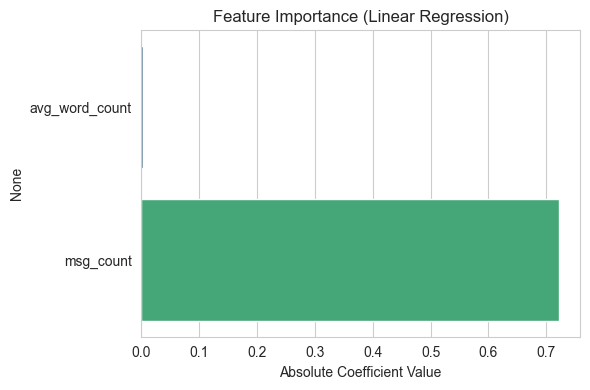

In [107]:
feature_importance = np.abs(model.coef_)
feature_names = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.title("Feature Importance (Linear Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()